In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('../prep/lr_dataset.csv', encoding = 'utf-8')
df.columns

Index(['행정동', '면적', '주민등록인구', '유동인구', '인구밀도', '신고건수', '사고발생건수', 'ECLO'], dtype='object')

In [3]:
df.describe()

,면적,주민등록인구,유동인구,인구밀도,신고건수,사고발생건수,ECLO
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,26.955595,12662.099359,97689.706596,6085.667073,819.916667,4.073718,6.005342
std,25.824513,11915.530275,177166.654121,13373.838700,869.820907,9.879874,14.652469
min,0.066903,1103.000000,465.781250,20.911585,17.000000,0.000000,0.000000
25%,2.162734,3403.250000,11855.815975,83.840969,201.750000,0.000000,0.000000
50%,22.529036,8345.000000,16295.315170,651.544317,584.500000,0.000000,0.000000
75%,44.524168,18667.750000,160819.221200,8297.803587,1144.000000,1.000000,0.833333
max,112.719484,85698.000000,662921.484500,123730.915500,7027.000000,71.000000,103.666667


면적


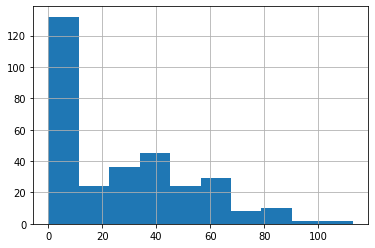

주민등록인구


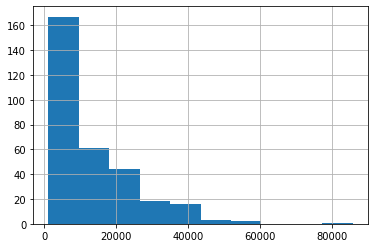

유동인구


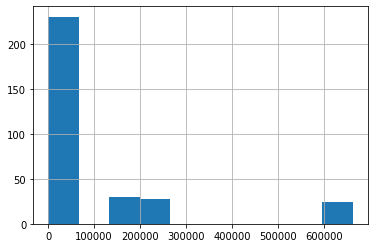

인구밀도


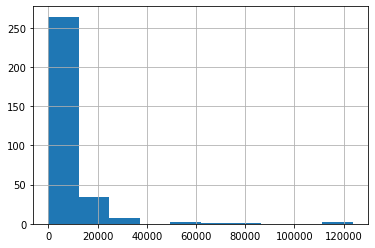

신고건수


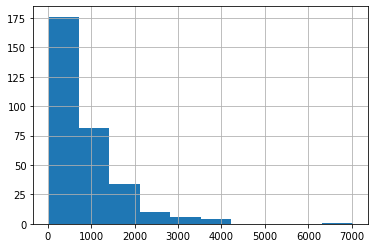

사고발생건수


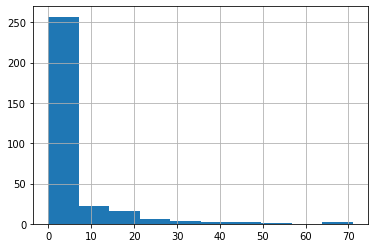

ECLO


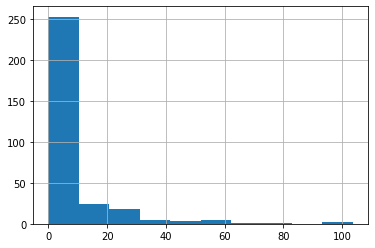

In [4]:
for col in df.columns[1:]:
  print(col)
  df[col].hist()
  plt.show()

면적


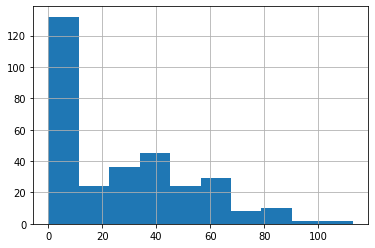

주민등록인구


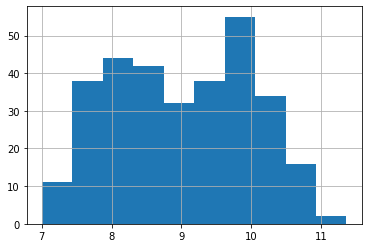

유동인구


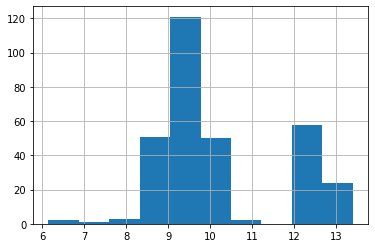

인구밀도


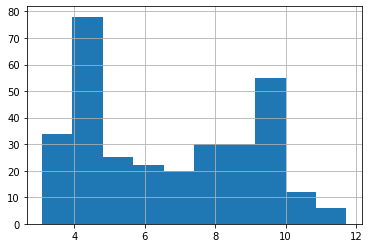

신고건수


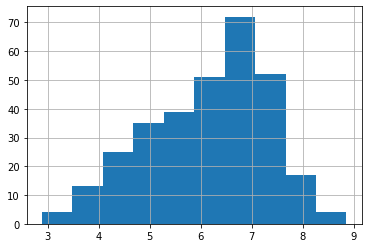

사고발생건수


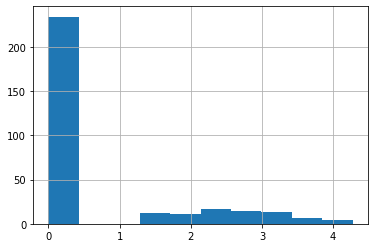

ECLO


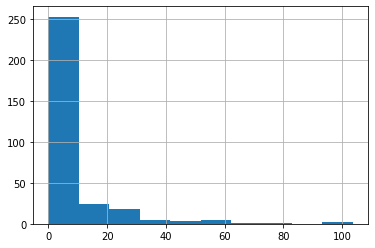

In [5]:
# linear regression은 정규분포하는 데이터에서 잘 동작한다.
# 데이터 편향이 큰 data를 log변환

scaled_df = df.copy()
scaled_df['유동인구'] = df['유동인구'].apply(lambda x: np.log(x+1))
scaled_df['신고건수'] = df['신고건수'].apply(lambda x: np.log(x+1))
scaled_df['인구밀도'] = df['인구밀도'].apply(lambda x: np.log(x+1))
scaled_df['주민등록인구'] = df['주민등록인구'].apply(lambda x: np.log(x+1))
scaled_df['사고발생건수'] = df['사고발생건수'].apply(lambda x: np.log(x+1))

for col in df.columns[1:]:
  print(col)
  scaled_df[col].hist()
  plt.show()

<AxesSubplot:>

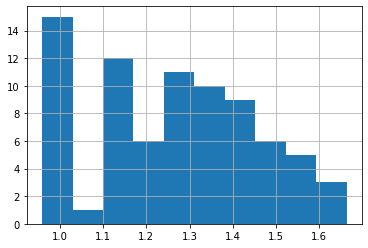

In [6]:
train = scaled_df[scaled_df['사고발생건수'] > 0]

train['사고발생건수'] = train['사고발생건수'].apply(lambda x: np.log(x+1))
train['사고발생건수'].hist()

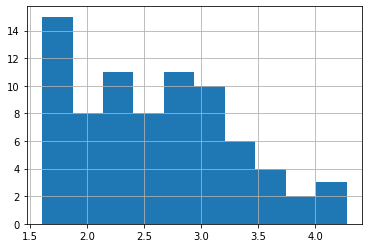

In [19]:
train = scaled_df[scaled_df['사고발생건수'] > 0]
train['사고발생건수'].hist()

In [7]:
scaler = MinMaxScaler()
scaler.fit(scaled_df[['유동인구', '인구밀도', '신고건수']])
scaled_df[['유동인구', '인구밀도', '신고건수']] = scaler.transform(scaled_df[['유동인구', '인구밀도', '신고건수']])

In [8]:
l = ['회덕동', '관저2동', '석교동', '구즉동', '도마2동', '용전동', '유천2동', '은행선화동', '용두동', '법2동', '대사동', '괴정동', '둔산3동', '갈마2동', '태평2동', '오류동', '성남동', '월평3동', '중리동', '삼성동', '가양2동', '둔산1동']

scaled_df['ECLO'][scaled_df['행정동'].apply(lambda x: x in l)] = 0
scaled_df[df['행정동'] == '석교동']

,행정동,면적,주민등록인구,유동인구,인구밀도,신고건수,사고발생건수,ECLO
21,석교동,3.995086,9.624038,0.826152,0.596393,0.62636,1.609438,0.0


In [9]:
features = ['유동인구', '인구밀도', '신고건수']
label = 'ECLO'

train = scaled_df[scaled_df[label] > 0]
test = scaled_df[scaled_df[label] == 0]

X = train[features]
y = train[label]

In [10]:
random_state = 42
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=random_state, test_size=0.2)

In [11]:
test

,행정동,면적,주민등록인구,유동인구,인구밀도,신고건수,사고발생건수,ECLO
0,효동,2.087250,10.076180,0.838616,0.723865,0.679161,0.0,0.0
1,판암1동,6.044410,9.398478,0.838616,0.522378,0.633095,0.0,0.0
2,판암2동,0.761826,9.005896,0.838616,0.716633,0.510202,0.0,0.0
3,용운동,3.504477,9.974179,0.838616,0.652082,0.620954,0.0,0.0
4,자양동,1.161701,9.292013,0.838616,0.700918,0.629217,0.0,0.0
...,...,...,...,...,...,...,...,...
307,연기면,12.247587,7.872455,0.442372,0.264432,0.432676,0.0,0.0
308,해밀동,8.475248,9.083302,0.447227,0.446817,0.438896,0.0,0.0
309,연동면,21.741566,7.990238,0.346559,0.211949,0.377272,0.0,0.0
310,반곡동,18.377297,10.185390,0.447227,0.484776,0.572438,0.0,0.0


### sklearn의 linear regression package 사용


In [12]:
line_fitter = LinearRegression()
line_fitter.fit(X_train, y_train)

LinearRegression()

In [13]:
print(line_fitter.intercept_, line_fitter.coef_, line_fitter.score(X_train, y_train))

-51.652083163419434 [-6.58467495 18.7976272  96.42482135] 0.21136991069345257


In [14]:
y_pred = line_fitter.predict(X_val)
print('RMSE: {}'.format(mean_squared_error(y_val, y_pred)**0.5))

RMSE: 20.93102029751803


In [15]:
y_pred

array([19.3090685 , 30.27172998, 29.30103668, 15.16475589, 40.23033603,
       26.77191011, 14.59489922, 37.18957456, 41.10432494, 43.1909118 ,
       14.74142355, 17.87669175])

### statsmodels.api의 OLS 사용

In [ ]:
# !pip install statsmodels

In [19]:
import statsmodels.api as sm

scaled_df = df.copy()
scaled_df['유동인구'] = df['유동인구'].apply(lambda x: np.log(x+1))
scaled_df['신고건수'] = df['신고건수'].apply(lambda x: np.log(x+1))
scaled_df['인구밀도'] = df['인구밀도'].apply(lambda x: np.log(x+1))
scaled_df['주민등록인구'] = df['주민등록인구'].apply(lambda x: np.log(x+1))
scaled_df['ECLO'] = df['ECLO'].apply(lambda x: np.log(x+1))

scaler = MinMaxScaler()
scaler.fit(scaled_df[['유동인구', '인구밀도', '신고건수']])
scaled_df[['유동인구', '인구밀도', '신고건수']] = scaler.transform(scaled_df[['유동인구', '인구밀도', '신고건수']])

features = ['유동인구', '인구밀도', '신고건수']
label = 'ECLO'

train = scaled_df[scaled_df[label] > 0]
test = scaled_df[scaled_df[label] == 0]

X = train[features]
y = train[label]

model1 = sm.OLS(y, X).fit()
print(model1.summary())

                                 OLS Regression Results                                
Dep. Variable:                   ECLO   R-squared (uncentered):                   0.945
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                              430.8
Date:                Mon, 27 Feb 2023   Prob (F-statistic):                    3.56e-47
Time:                        14:49:21   Log-Likelihood:                         -83.813
No. Observations:                  78   AIC:                                      173.6
Df Residuals:                      75   BIC:                                      180.7
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [20]:
X = sm.add_constant(X)

model2 = sm.OLS(y, X).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   ECLO   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     4.703
Date:                Mon, 27 Feb 2023   Prob (F-statistic):            0.00464
Time:                        14:49:31   Log-Likelihood:                -83.755
No. Observations:                  78   AIC:                             175.5
Df Residuals:                      74   BIC:                             184.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2715      0.822      0.330      0.7

상수항이 존재한다고 가정하고 진행한 Linear Regression 분석을 기각한다.
- 유동인구, 인구밀도, 신고건수 모두 0인 지역을 가정할 때, 임의의 ECLO 값이 존재할 수 있다는 가정은 불가능하다.
- 해당 분석의 R-squared 값 역시 현저히 낮아 상수항 존재의 설명력이 부족하다는 것을 확인할 수 있다.

In [27]:
test[label] = model1.predict(test[features])
test.rename(columns={'ECLO':'잠재적 위험지수'}, inplace = True)
test

,행정동,면적,주민등록인구,유동인구,인구밀도,신고건수,사고발생건수,잠재적 위험지수,잠재적 위험지수
0,효동,2.087250,10.076180,0.838616,0.723865,0.679161,0.0,2.805573,2.805573
1,판암1동,6.044410,9.398478,0.838616,0.522378,0.633095,0.0,2.392291,2.392291
2,판암2동,0.761826,9.005896,0.838616,0.716633,0.510202,0.0,2.229902,2.229902
3,용운동,3.504477,9.974179,0.838616,0.652082,0.620954,0.0,2.518228,2.518228
4,자양동,1.161701,9.292013,0.838616,0.700918,0.629217,0.0,2.608670,2.608670
...,...,...,...,...,...,...,...,...,...
307,연기면,12.247587,7.872455,0.442372,0.264432,0.432676,0.0,1.578563,1.578563
308,해밀동,8.475248,9.083302,0.447227,0.446817,0.438896,0.0,1.831409,1.831409
309,연동면,21.741566,7.990238,0.346559,0.211949,0.377272,0.0,1.371238,1.371238
310,반곡동,18.377297,10.185390,0.447227,0.484776,0.572438,0.0,2.327835,2.327835
